Instalación de librerias necesarias

In [5]:
#!pip install scikit-learn
#!pip install pandas
#!pip install numpy
#!pip install matplotlib



Importación de dichas librerías

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

Un pequeño análisis de que tipo de datos y sus respectivas formas estamos usando

In [119]:
dataframe = pd.read_csv("City_Types.csv")
print("Forma del dataset: ", dataframe.shape, "\nColumnas: ", dataframe.columns)
print("\n Mas informacion del dataset: \n")
dataframe.describe()




Forma del dataset:  (52704, 9) 
Columnas:  Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'Type'], dtype='object')

 Mas informacion del dataset: 



,CO,NO2,SO2,O3,PM2.5,PM10
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,508.030472,29.616492,22.387250,53.423668,32.931045,50.644980
std,692.274824,23.984409,34.285823,42.225556,43.833691,67.311502
min,0.000000,0.900000,0.000000,0.000000,0.300000,0.400000
25%,187.000000,11.000000,0.700000,26.000000,6.400000,9.400000
50%,268.000000,23.300000,10.500000,48.000000,14.800000,19.800000
75%,519.000000,42.200000,30.200000,69.000000,42.600000,68.350000
max,12876.000000,218.000000,497.800000,342.000000,459.100000,661.200000


PM2.5 y PM10: Partículas que su diametro es inferior al número adyacente en micrómetros

Limpieza del dataframe

In [120]:
dataframe = dataframe.drop(columns=["City", "Date"])
#remplazar el tipo de ciudad por un valor numerico
dataframe.replace({"Type": {"Industrial": 0, "Residential": 1}}, inplace=True)
#no eliminamos "nulos" dado a que no existen

Gráficar unas cuantas columnas para ver como es el comportamiento de las variables

Text(0.5, 1.0, 'CO vs SO2')

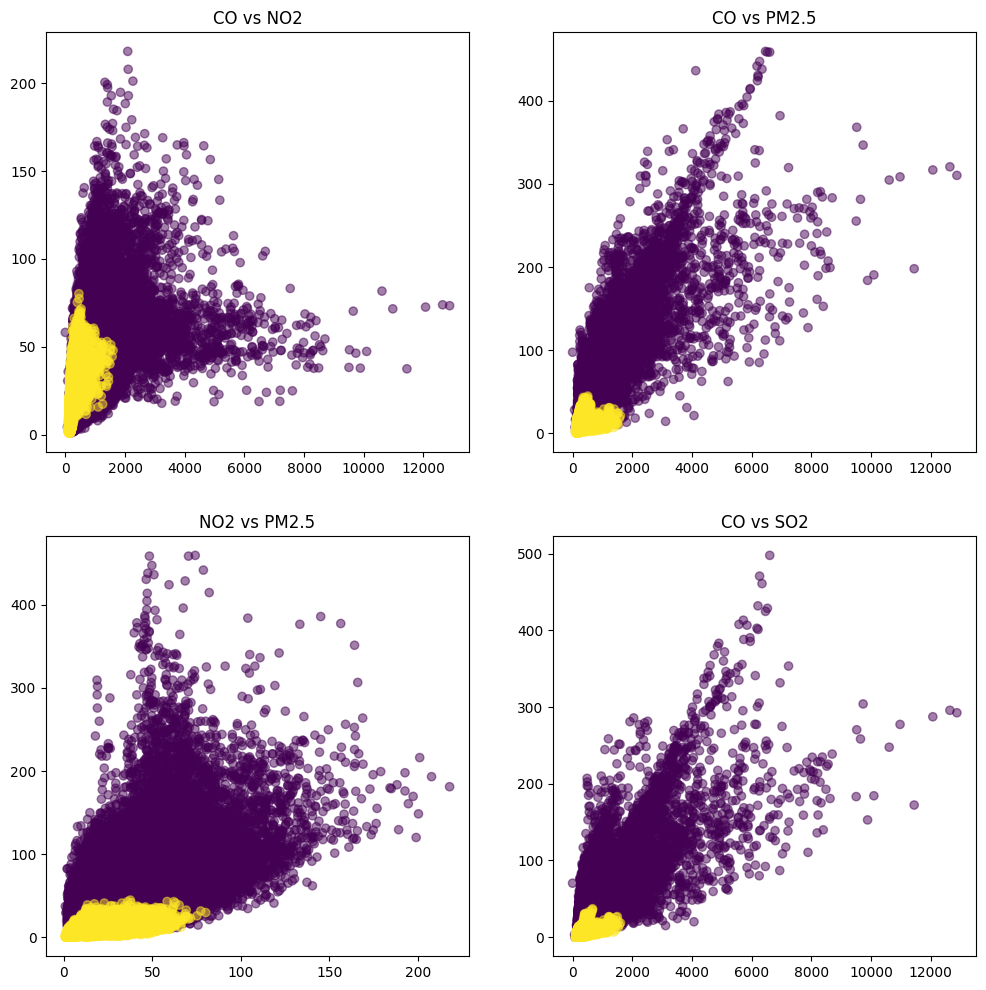

In [109]:

figure, axis = plt.subplots(2,2, figsize=(12, 12))
axis[0,0].scatter(dataframe["CO"], dataframe["NO2"], c=dataframe["Type"], cmap='viridis', alpha=0.5)
axis[0,0].set_title("CO vs NO2")
axis[0,1].scatter(dataframe["CO"], dataframe["PM2.5"], c=dataframe["Type"], cmap='viridis', alpha=0.5)
axis[0,1].set_title("CO vs PM2.5")
axis[1,0].scatter(dataframe["NO2"], dataframe["PM2.5"], c=dataframe["Type"], cmap='viridis', alpha=0.5)
axis[1,0].set_title("NO2 vs PM2.5")
axis[1,1].scatter(dataframe["CO"], dataframe["SO2"], c=dataframe["Type"], cmap='viridis', alpha=0.5)
axis[1,1].set_title("CO vs SO2")

Se puede ver que a simple vista, la mayoría de los datos del conjunto "residencial" se concentran en 0 

In [110]:
dataframe.head()


,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,208.0,15.9,13.2,44.0,8.6,9.4,0
1,207.0,17.4,13.7,44.0,8.6,10.5,0
2,217.0,19.0,15.5,43.0,10.4,12.9,0
3,231.0,21.0,20.7,36.0,12.3,15.3,0
4,263.0,34.5,27.2,27.0,13.6,20.0,0


In [111]:
datafeatures = dataframe.drop('Type', axis=1)
#Escalar la información
data_scaled = StandardScaler().fit_transform(datafeatures)
print("Datos escalados: \n", data_scaled[:5])

Datos escalados: 
 [[-0.43340204 -0.57189746 -0.26796313 -0.22317663 -0.55508162 -0.61275368]
 [-0.43484656 -0.50935623 -0.25337971 -0.22317663 -0.55508162 -0.59641159]
 [-0.4204013  -0.4426456  -0.20087938 -0.2468592  -0.51401692 -0.56075613]
 [-0.40017792 -0.3592573  -0.04921176 -0.41263715 -0.47067086 -0.52510067]
 [-0.35395307  0.2036137   0.14037277 -0.62578024 -0.44101302 -0.45527539]]


Aplicar tanto PCA como TSNE con el propósito de ver distintas formas de reducción de dimensionalidad

Text(0.5, 1.0, 'dataframe PCA')

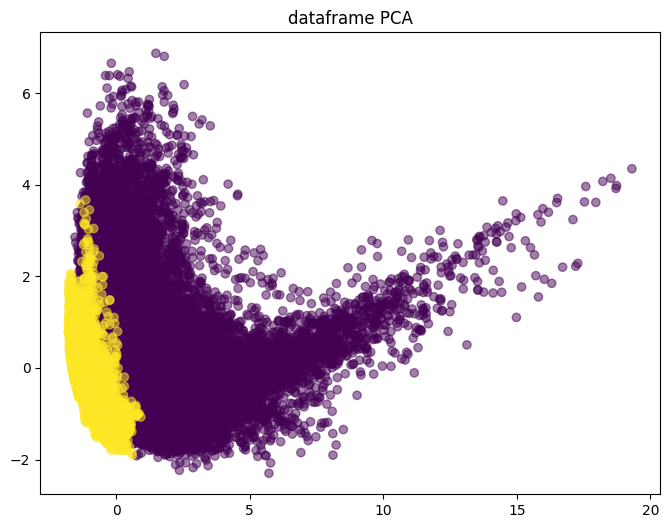

In [112]:
#PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

#graficar PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dataframe["Type"], cmap='viridis', alpha=0.5)
plt.title("dataframe PCA")

Text(0.5, 1.0, 'dataframe TSNE')

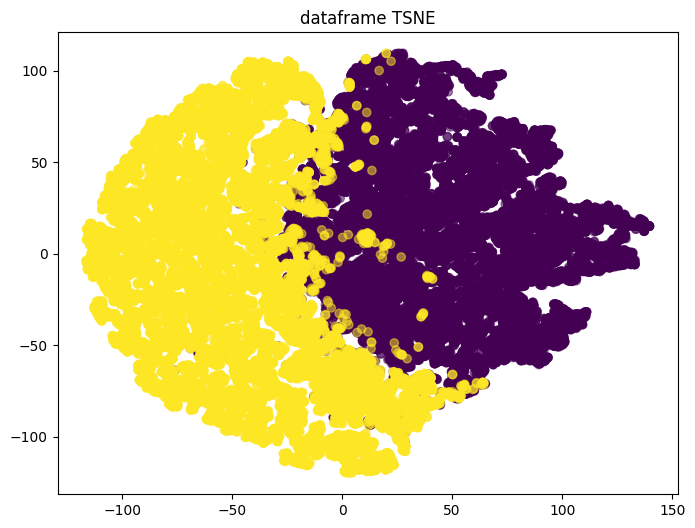

In [113]:
#TSNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

#graficar TSNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dataframe["Type"], cmap='viridis', alpha=0.5)
plt.title("dataframe TSNE")

TSNE tiene una forma mucho mas "trabajable"


Text(0.5, 1.0, 'DBSCAN Clustering')

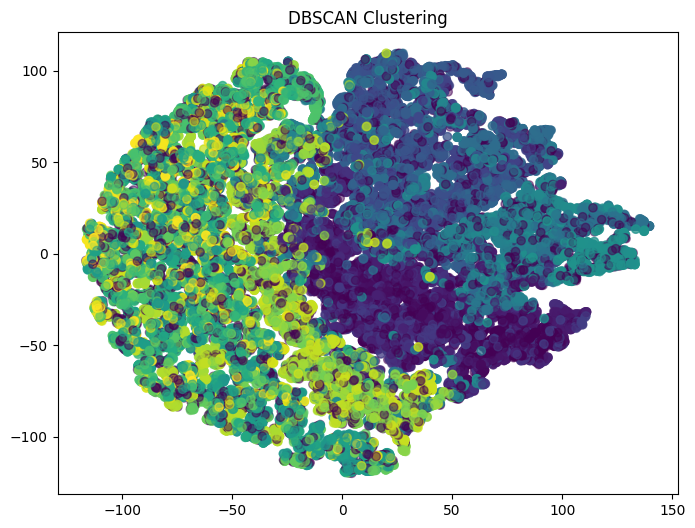

In [128]:
#dbscan
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan_labels = dbscan.fit_predict(data_tsne)
# Graficar DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering")

*La selección de los hiperparámetros fué usando un diccionario que por la enorme cantidad de outputs, fué omitido

In [115]:
combinatoria = {"c":[2,3,4,5,6,7,8]}
#kmeans
for c in combinatoria["c"]:
    kmeans = KMeans(n_clusters=c, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_tsne)

    # Calcular y mostrar la puntuación de homogeneidad y silueta
    homogenety_kmeans = homogeneity_score(dataframe["Type"], kmeans_labels)
    silhouette_kmeans = silhouette_score(data_tsne, kmeans_labels)
    print(f"Homogeneity Score KMeans con {c} clusters: {homogenety_kmeans}")
    print(f"Silhouette Score KMeans con {c} clusters: {silhouette_kmeans}")

Homogeneity Score KMeans con 2 clusters: 0.5585696565537553
Silhouette Score KMeans con 2 clusters: 0.35828500986099243
Homogeneity Score KMeans con 3 clusters: 0.5213205895135679
Silhouette Score KMeans con 3 clusters: 0.38004177808761597
Homogeneity Score KMeans con 4 clusters: 0.4905261844498488
Silhouette Score KMeans con 4 clusters: 0.3720587491989136
Homogeneity Score KMeans con 5 clusters: 0.6119624881684348
Silhouette Score KMeans con 5 clusters: 0.348981112241745
Homogeneity Score KMeans con 6 clusters: 0.5750074676653492
Silhouette Score KMeans con 6 clusters: 0.3602127730846405
Homogeneity Score KMeans con 7 clusters: 0.6986271631865755
Silhouette Score KMeans con 7 clusters: 0.372354656457901
Homogeneity Score KMeans con 8 clusters: 0.736159840723182
Silhouette Score KMeans con 8 clusters: 0.36577343940734863


8 Clusters es el más "óptimo"

Text(0.5, 1.0, 'KMeans Clustering')

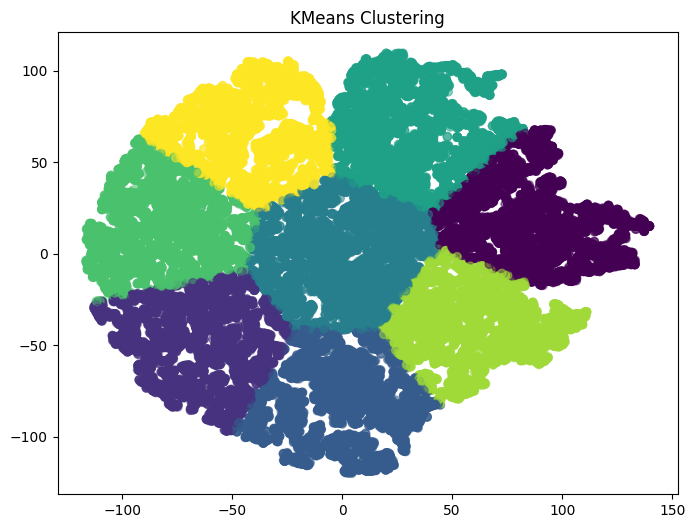

In [131]:
#kmeans
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(data_tsne)
# Graficar KMeans
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title("KMeans Clustering")

In [129]:
#silhouette score
silhouette_kmeans = silhouette_score(data_tsne, kmeans_labels)
silhouette_dbscan = silhouette_score(data_tsne, dbscan_labels)
print(f"Silhouette Score for KMeans: {silhouette_kmeans}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
#homogenity score
from sklearn.metrics import homogeneity_score
homogeneity_kmeans = homogeneity_score(dataframe["Type"], kmeans_labels)
homogeneity_dbscan = homogeneity_score(dataframe["Type"], dbscan_labels)

Silhouette Score for KMeans: 0.35828500986099243
Silhouette Score for DBSCAN: 0.37571319937705994


In [130]:
print(f"Homogeneity Score for KMeans: {homogeneity_kmeans}")
print(f"Homogeneity Score for DBSCAN: {homogeneity_dbscan}")

Homogeneity Score for KMeans: 0.5585696565537553
Homogeneity Score for DBSCAN: 0.836321923414645


Birch:
-Distancia euclidiana entre puntos
-Remueve outlayers
-útil para un grán número de clusters 
fuente: https://scikit-learn.org/stable/modules/clustering.html

Text(0.5, 1.0, 'Birch Clustering')

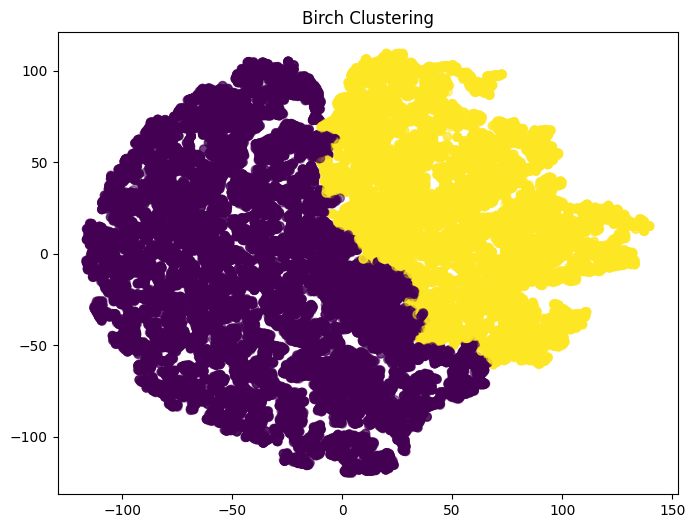

In [ ]:
data_birch = Birch(n_clusters=2)
birch_labels = data_birch.fit(data_tsne)
# Graficar Birch
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=birch_labels.predict(data_tsne), cmap='viridis', alpha=0.5)
plt.title("Birch Clustering")

In [123]:
homogenety_breach = homogeneity_score(dataframe["Type"], birch_labels.predict(data_tsne))
silhouette_breach = silhouette_score(data_tsne, birch_labels.predict(data_tsne))
print(f"Homogeneity Score for Birch: {homogenety_breach}")
print(f"Silhouette Score for Birch: {silhouette_breach}")

Homogeneity Score for Birch: 0.3544466998271273
Silhouette Score for Birch: 0.3225274085998535


Conclusión:

El modelo trabajado se puede considerar moderadamente aceptable, no obstante, pueden existir algoritmos más óptimos para detectar mejor los resultados por TSNE

La otra alternativa para mejorar el modelo sería buscar otra opción de reducción de dimensionalidad

Otra forma de haber trabajado el proyecto sería usando como objetivo las ciudades, con tal de ver la diferencia en el comportamiento de los algoritmos implementados 